In [1]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
from matplotlib import colors as c

In [2]:
SIGMA1 = [[1, 0], [0, 1]]
mu1 = (0, 0)
mu2 = (1, 1)

#SIGMA1 = [[1, 1/2], [1/2, 1]]
#SIGMA2 = [[1, 0], [0, 1]]

<h1>TASK 2</h1>

In [3]:
p = np.random.permutation(200)

In [4]:
X = np.random.uniform(-1, 1, 200)

mu = np.concatenate((1*np.ones(100), -1*np.ones(100)), axis=0)

Z = mu + np.random.laplace(0, 1/2, 200)

Y = X + Z

X_ = X[p]
mu = mu[p]
Y_ = Y[p]

In [5]:
clf = LinearDiscriminantAnalysis(solver='svd')
clf.fit(np.array([X_[:160], Y_[:160]]).T, mu[:160])

LinearDiscriminantAnalysis()

In [6]:
(clf.predict(np.array([X_[160:], Y_[160:]]).T) == mu[160:]).mean()

0.975

In [7]:
clf.coef_, clf.intercept_

(array([[-3.21781936,  3.27019032]]), array([-0.23979598]))

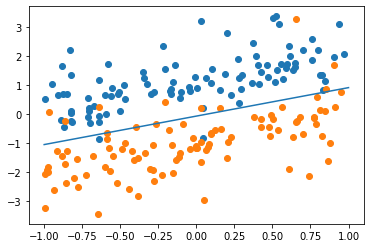

In [8]:
x = np.array([-1, 1])
#y = clf.coef_*x + clf.intercept_
y =  -(x*clf.coef_[0, 0] - clf.intercept_)/clf.coef_[0, 1]

plt.plot(x, y)
plt.scatter(X[:100], Y[:100])
plt.scatter(X[100:], Y[100:])

In [9]:
from sklearn.svm import LinearSVC

In [10]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, C=0.00001))
clf.fit(np.array([X_[:160], Y_[:160]]).T, mu[:160])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1e-05, random_state=0, tol=1e-05))])

In [11]:
(clf.predict(np.array([X_[160:], Y_[160:]]).T) == mu[160:]).mean()

0.875

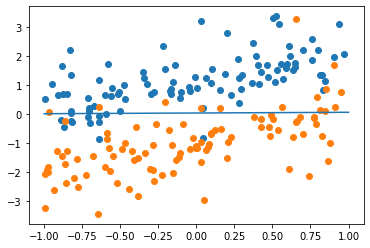

In [12]:
x = np.array([-1, 1])
#y = clf.coef_*x + clf.intercept_
y =  -(x*clf.steps[1][1].coef_[0, 0] - clf.steps[1][1].intercept_)/clf.steps[1][1].coef_[0, 1]

plt.plot(x, y)
plt.scatter(X[:100], Y[:100])
plt.scatter(X[100:], Y[100:])

<h1>TASK 3</h1>

In [13]:
import sklearn.datasets
import numpy as np

In [14]:
X_, y_ = sklearn.datasets.make_multilabel_classification(
    n_samples=1000, n_features=2, n_classes=4, allow_unlabeled=False,  n_labels=1, random_state=0)

In [15]:
labels = list()
X = list()

for i, arr in enumerate(y_):
    if arr.sum() == 1:
        labels.append(np.argmax(arr))
        X.append(X_[i])
X = np.array(X)
labels = np.array(labels)

In [16]:
X.shape, labels.shape

((588, 2), (588,))

In [17]:
# red, orange, blue, violet
colors = ['#ff0000', '#ff8400', '#0004ff', '#9b00fc']
colors_smooth=['#e38a8a', '#fabb78', '#7c7ef7','#d6aaf2']

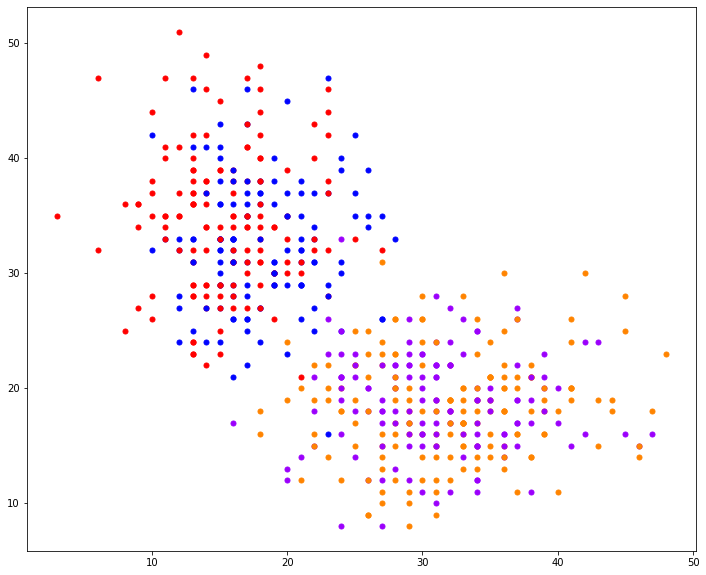

In [18]:
plt.figure(figsize=(12, 10))
for i, x in enumerate(X):
    color = colors[labels[i]]
    plt.plot(x[0], x[1], marker="o", 
             markersize=5, markeredgecolor=color, 
             markerfacecolor=color)

<h1>SVM WITH GAUSS</h1>

In [19]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X, labels)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [20]:
(clf.predict(X) == labels).mean()

0.5867346938775511

In [21]:
nsx = 200
nsy = 200
# Data to be plotted
x = np.outer(np.linspace(0, 50, nsx), np.ones(nsy))
y_y = np.outer(np.linspace(0, 60, nsy), np.ones(nsx)).T

z = np.zeros((nsx, nsy))

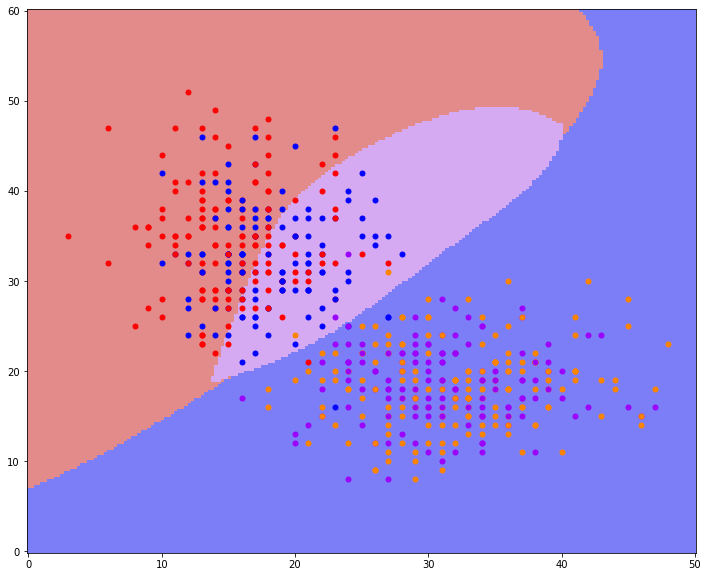

In [22]:
plt.figure(figsize=(12, 10))
Z = list()

for i in range(len(x)):
    preds = clf.predict(np.array([x[i], y_y[i]]).T)
    Z.append(preds)
cMap = c.ListedColormap(colors_smooth)
plt.pcolormesh( x, y_y, Z, shading = 'nearest', cmap=cMap)
for i, x_ in enumerate(X):
    color = colors[labels[i]]
    plt.plot(x_[0], x_[1], marker="o", 
             markersize=5, markeredgecolor=color, 
             markerfacecolor=color)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

Xt = X
y = labels

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.25, random_state=3213)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    svm.SVC(kernel="rbf", probability=True, random_state=5)
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

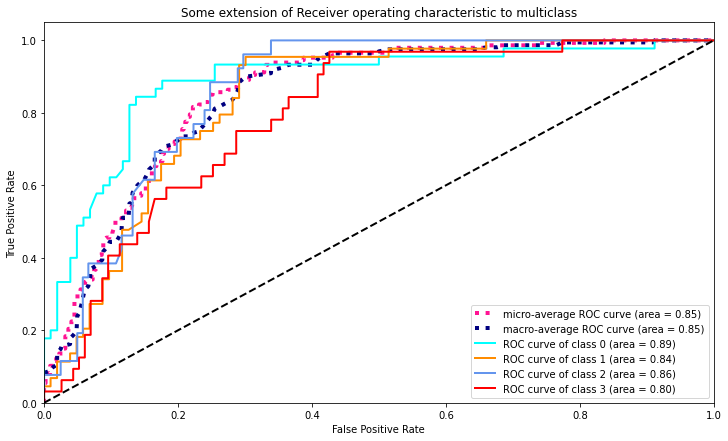

In [24]:
# First aggregate all false positive rates
lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "red"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

<h1>QDA</h1>

In [25]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(X, labels)

QuadraticDiscriminantAnalysis()

In [26]:
(clf.predict(X) == labels).mean()

0.5850340136054422

In [27]:
# red, orange, blue, violet
colors = ['#ff0000', '#ff8400', '#0004ff', '#9b00fc']
colors_smooth=['#e38a8a', '#fabb78', '#7c7ef7','#d6aaf2']

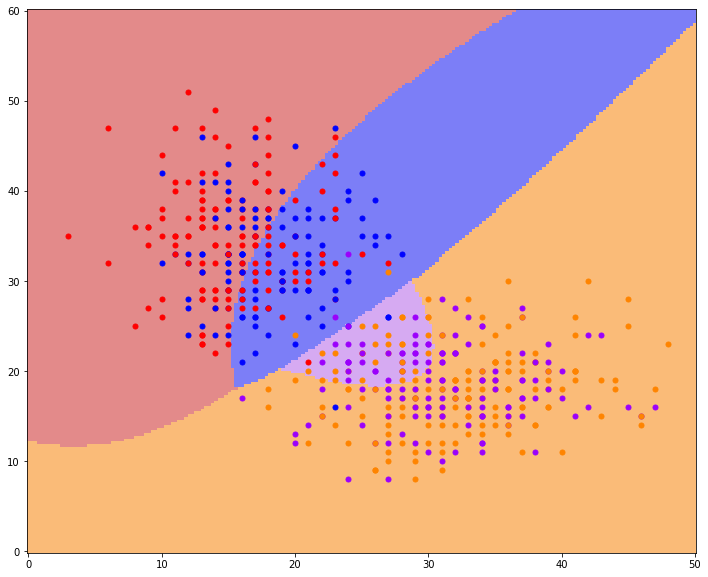

In [28]:
plt.figure(figsize=(12, 10))
Z = list()

for i in range(len(x)):
    preds = clf.predict(np.array([x[i], y_y[i]]).T)
    Z.append(preds)
cMap = c.ListedColormap(colors_smooth)
plt.pcolormesh( x, y_y, Z, shading = 'nearest', cmap=cMap)
for i, x_ in enumerate(X):
    color = colors[labels[i]]
    plt.plot(x_[0], x_[1], marker="o", 
             markersize=5, markeredgecolor=color, 
             markerfacecolor=color)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

Xt = X
y = labels

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2, 3])
n_classes = y.shape[1]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(Xt, y, test_size=0.25, random_state=3213)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(
    QuadraticDiscriminantAnalysis()
)
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

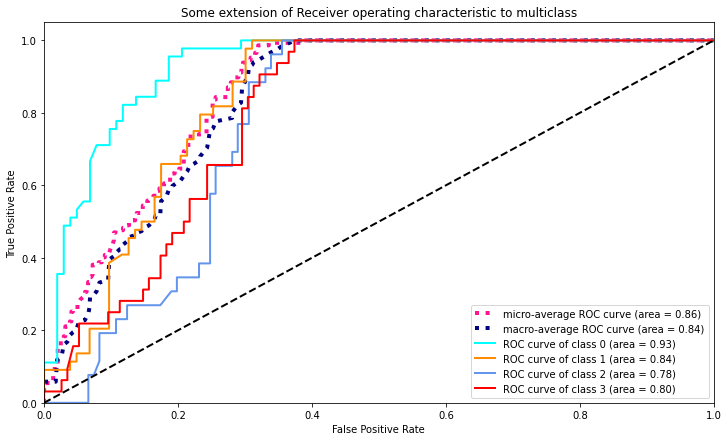

In [30]:
# First aggregate all false positive rates
lw = 2
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize=(12, 7))
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue", "red"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()